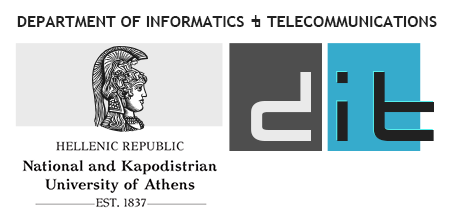
# **Data Mining Techniques - Project 1 - Spring Semester 2023**
**Papasotiri Christina - 1115201900151**

In [329]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing/Clear data

##  Insert data from marketing_campaign.csv file

In [330]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


## Check & handle missing data

 ### Look into data 

In [331]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [332]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Above we notice that the 'Income' column contains NaN values:

In [334]:
display(df['Income'].isnull().values.any())
display(df["Income"].isnull())

True

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool

Handle missing values by dropping rows contains them:

In [335]:
df = df.dropna()
df.isnull().values.any()

False

## Convert data columns

### Convert date columns to DateTime objects:

In [336]:
import datetime as dt

In [337]:
# date format is DD-MM-YYYY
df.loc[:, 'Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')



## Check for attributes to convert into numeric values:

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

### The Education column is dtype:object and can be converted to numeric values

In [339]:
df.loc[:, 'Education'] = pd.to_numeric(df['Education'], errors='coerce')

# Processing and presentation of unique values in Marital_Status & Education columns:

In [340]:
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [341]:
print(df['Education'].unique())

[nan]


### Grouping Marital_Status values [Alone,Absurd,YOLO] as 'Single':

In [342]:
df.loc[:, 'Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
print(df['Marital_Status'])

0         Single
1         Single
2       Together
3       Together
4        Married
          ...   
2235     Married
2236    Together
2237    Divorced
2238    Together
2239     Married
Name: Marital_Status, Length: 2216, dtype: object


### Plot count of values in each category using bar chart:

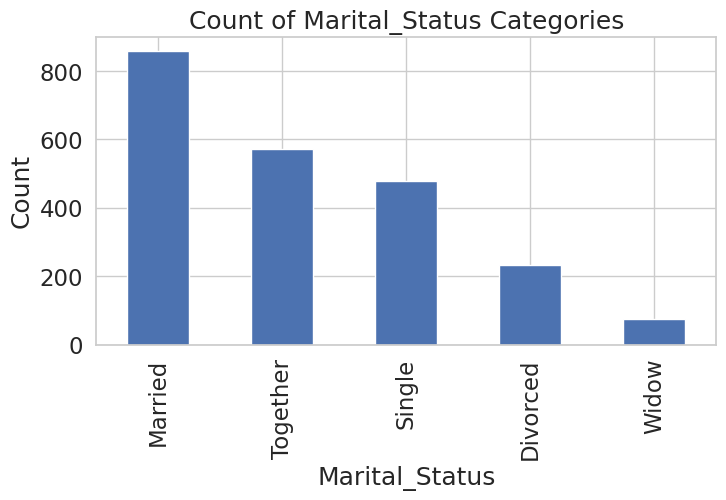

In [343]:
plt.figure(figsize=(8, 4))
df['Marital_Status'].value_counts().plot(kind='bar')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.title("Count of Marital_Status Categories")
plt.show()

# Create new attributes:



## Create Customer_For attribute that represents the number of days customers started shopping at the store relative to the last recorded Recency date

The Dt_Customer column contains the customer's register date and the Recency column contains the number of days since the last purchase: 

In [344]:
df.loc[:, ['Dt_Customer', 'Recency']]

,Dt_Customer,Recency
0,2012-09-04 00:00:00,58
1,2014-03-08 00:00:00,38
2,2013-08-21 00:00:00,26
3,2014-02-10 00:00:00,26
4,2014-01-19 00:00:00,94
...,...,...
2235,2013-06-13 00:00:00,46
2236,2014-06-10 00:00:00,56
2237,2014-01-25 00:00:00,91
2238,2014-01-24 00:00:00,8


Calculate the date of the last purchase:

In [345]:
def calculateLastPurchaseDay(recency):
  """ find last purchase date using today's date minus recency number """
  return dt.date.today() - dt.timedelta(days=recency)

last_purchase = df['Recency'].apply(calculateLastPurchaseDay)
last_purchase

0       2024-01-07
1       2024-01-27
2       2024-02-08
3       2024-02-08
4       2023-12-02
           ...    
2235    2024-01-19
2236    2024-01-09
2237    2023-12-05
2238    2024-02-26
2239    2024-01-25
Name: Recency, Length: 2216, dtype: object

Calculation of number of days that have passed from the day of registration to the day of the last purchase:

In [346]:
# fix dates format 
last_purchase = pd.to_datetime(last_purchase, format='%Y-%m-%d')
dt_customer = pd.to_datetime(df['Dt_Customer'], dayfirst=True, format='%d-%m-%Y')

# calculate days  
customer_for = last_purchase - dt_customer

For data consistency reasons:

In [347]:
# find 'Recency' column position 
idx = df.columns.get_loc('Recency')

# insert 'Customer_For' column next of 'Recency' column
df.insert(loc = idx+1, column = 'Customer_For', value = customer_for)

df.loc[:, ['Dt_Customer', 'Recency', 'Customer_For']]

,Dt_Customer,Recency,Customer_For
0,2012-09-04 00:00:00,58,4142 days
1,2014-03-08 00:00:00,38,3612 days
2,2013-08-21 00:00:00,26,3823 days
3,2014-02-10 00:00:00,26,3650 days
4,2014-01-19 00:00:00,94,3604 days
...,...,...,...
2235,2013-06-13 00:00:00,46,3872 days
2236,2014-06-10 00:00:00,56,3500 days
2237,2014-01-25 00:00:00,91,3601 days
2238,2014-01-24 00:00:00,8,3685 days


## Calculate Age attribute based on Year_Birth column



Calculate the customer age using the Year_Birth and the current year:

In [348]:
def calculateAge(birth):
  birth =  pd.to_datetime(birth, format='%Y')
  today = dt.date.today()
  return today.year - birth.year

age = df['Year_Birth'].apply(calculateAge)

For data consistency reasons:

In [349]:
# find 'Year_Birth' column position 
idx = df.columns.get_loc('Year_Birth')

# insert 'Age' column next of 'Year_Birth' column
df.insert(loc = idx+1, column = 'Age', value = age)

df.loc[:, ['Year_Birth', 'Age']]

,Year_Birth,Age
0,1957,67
1,1954,70
2,1965,59
3,1984,40
4,1981,43
...,...,...
2235,1967,57
2236,1946,78
2237,1981,43
2238,1956,68


## Create Spent attribute as total amount spent in all categories over 2 years

In [350]:
sum_spend = df.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
print(sum_spend)

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Length: 2216, dtype: int64


For data consistency reasons:

In [351]:
# find 'MntGoldProds' column position 
idx = df.columns.get_loc('MntGoldProds')

# insert 'Spent' column next of 'MntGoldProds' column
df.insert(loc = idx+1, column = 'Spent', value = sum_spend)

df.loc[:, ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Spent']]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Spent
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,1341
2236,406,0,30,0,0,8,444
2237,908,48,217,32,12,24,1241
2238,428,30,214,80,30,61,843


## Create Children attribute as the total number of children in a household (kids and teenagers)

In [352]:
sum_children = df.loc[:, ['Kidhome', 'Teenhome']].sum(axis=1)
print(sum_children)

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Length: 2216, dtype: int64


For data consistency reasons

In [353]:
# find 'Teenhome' column position 
idx = df.columns.get_loc('Teenhome')

# insert 'Children' column next of 'Teenhome' column
df.insert(loc = idx+1, column = 'Children', value = sum_children)

df.loc[:, ['Kidhome', 'Teenhome', 'Children']]

,Kidhome,Teenhome,Children
0,0,0,0
1,1,1,2
2,0,0,0
3,1,0,1
4,1,0,1
...,...,...,...
2235,0,1,1
2236,2,1,3
2237,0,0,0
2238,0,1,1


## Create Family_Size attribute as the total number of people in a household

We already have the number of children in a household in the Children column and add the number of parents

In [354]:
# parents 
conditions = [
    (df['Marital_Status'] == 'Together') | (df['Marital_Status'] == 'Married'),
    (df['Marital_Status'] == 'Single') | (df['Marital_Status'] == 'Divorced') | (df['Marital_Status'] == 'Widow')
]
values = [2, 1]
parents = np.select(conditions, values)

family_size = df['Children'].add(parents)

for data consistency reasons:

In [355]:
# find 'Children' column position 
idx = df.columns.get_loc('Children')

# insert 'Family_Size' column next of 'Children' column
df.insert(loc = idx+1, column = 'Family_Size', value = family_size)

df.loc[:, ['Marital_Status', 'Children', 'Family_Size']]

,Marital_Status,Children,Family_Size
0,Single,0,1
1,Single,2,3
2,Together,0,2
3,Together,1,3
4,Married,1,3
...,...,...,...
2235,Married,1,3
2236,Together,3,5
2237,Divorced,0,1
2238,Together,1,3


## Create Is_Parent attribute to indicate if a customer is a parent

In [356]:
is_parent = np.where(df['Children'] > 0, True, False)

for data consistency reasons:

In [357]:
# find 'Children' column position 
idx = df.columns.get_loc('Children')

# insert 'Is_Parent' column next of 'Children' column
df.insert(loc = idx+1, column = 'Is_Parent', value = is_parent)

df.loc[:, ['Children', 'Is_Parent']]

,Children,Is_Parent
0,0,False
1,2,True
2,0,False
3,1,True
4,1,True
...,...,...
2235,1,True
2236,3,True
2237,0,False
2238,1,True


## Create Living_With attribute to extract Marital_Status of couples

In [358]:
print(df['Marital_Status'].unique())

['Single' 'Together' 'Married' 'Divorced' 'Widow']


In [359]:
conditions = [
    (df['Marital_Status'] == 'Together') | (df['Marital_Status'] == 'Married'),
    (df['Marital_Status'] == 'Single') | (df['Marital_Status'] == 'Divorced') | (df['Marital_Status'] == 'Widow')
]
values = ['Partner', 'Alone']

living_with = np.select(conditions, values)
living_with

array(['Alone', 'Alone', 'Partner', ..., 'Alone', 'Partner', 'Partner'],
      dtype='<U7')

for data consistency reasons:

In [360]:
# find 'Marital_Status' column position 
idx = df.columns.get_loc('Marital_Status')

# insert 'Living_With' column next of 'Children' column
df.insert(loc = idx+1, column = 'Living_With', value = living_with)

df.loc[:, ['Marital_Status', 'Living_With']]

,Marital_Status,Living_With
0,Single,Alone
1,Single,Alone
2,Together,Partner
3,Together,Partner
4,Married,Partner
...,...,...
2235,Married,Partner
2236,Together,Partner
2237,Divorced,Alone
2238,Together,Partner


## Create Age_Group attribute to group ages into predefined categories

In [361]:
conditions = [
    (df['Age'] > 20) & (df['Age'] <= 30),
    (df['Age'] > 30) & (df['Age'] <= 40),
    (df['Age'] > 40) & (df['Age'] <= 50),
    (df['Age'] > 50) & (df['Age'] <= 60),
    (df['Age'] > 60) & (df['Age'] <= 70),
    (df['Age'] > 70) & (df['Age'] <= 80),
    (df['Age'] > 80)
]
values = ['21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '>80']

age_group = np.select(conditions, values)
age_group

array(['61-70', '61-70', '51-60', ..., '41-50', '61-70', '61-70'],
      dtype='<U5')

for data consistency reasons:

In [362]:
# find 'Age' column position 
idx = df.columns.get_loc('Age')

# insert 'Age_Group' column next of 'Age' column
df.insert(loc = idx+1, column = 'Age_Group', value = age_group)

df.loc[:, ['Age', 'Age_Group']]

,Age,Age_Group
0,67,61-70
1,70,61-70
2,59,51-60
3,40,31-40
4,43,41-50
...,...,...
2235,57,51-60
2236,78,71-80
2237,43,41-50
2238,68,61-70


## Print the updated dataframe

In [363]:
df

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Living_With,Income,Kidhome,Teenhome,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,61-70,NaN,Single,Alone,58138.0,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,61-70,NaN,Single,Alone,46344.0,1,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,51-60,NaN,Together,Partner,71613.0,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,31-40,NaN,Together,Partner,26646.0,1,0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,41-50,NaN,Married,Partner,58293.0,1,0,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,51-60,NaN,Married,Partner,61223.0,0,1,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,78,71-80,NaN,Together,Partner,64014.0,2,1,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,43,41-50,NaN,Divorced,Alone,56981.0,0,0,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,68,61-70,NaN,Together,Partner,69245.0,0,1,...,3,0,0,0,0,0,0,3,11,0


# Detect outliers in the attributes and delete them from the data:

In [364]:
def detectOutliers(df, column):
  """ detect & handle outliers of a specific column in a dataframe """ 
  # calculate the Interquartile Range (IQR)
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  IQR = q3 - q1

  # define the upper & lower bounds for outliers
  lower = q1 - 1.5 * IQR
  upper = q3 + 1.5 * IQR

  # identify the rows with outlier values
  outliers = df[(df[column] < lower) | (df[column] > upper)]

  # remove the rows from dataframe
  df = df[~((df[column] < lower) | (df[column] > upper))]


columns = 'Age', 'Income'
for column in columns:
  detectOutliers(df, column)
df.loc[:, ['ID', 'Age', 'Income']]

,ID,Age,Income
0,5524,67,58138.0
1,2174,70,46344.0
2,4141,59,71613.0
3,6182,40,26646.0
4,5324,43,58293.0
...,...,...,...
2235,10870,57,61223.0
2236,4001,78,64014.0
2237,7270,43,56981.0
2238,8235,68,69245.0


# Examine the correlation between attributes with a heatmap chart.

Extract numerical features

In [365]:
numerical_features = df.select_dtypes(include='number')
numerical_features

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,Children,Family_Size,Recency,Customer_For,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,58138.0,0,0,0,1,58,4142 days,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,46344.0,1,1,2,3,38,3612 days,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,71613.0,0,0,0,2,26,3823 days,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,26646.0,1,0,1,3,26,3650 days,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,58293.0,1,0,1,3,94,3604 days,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,57,61223.0,0,1,1,3,46,3872 days,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,78,64014.0,2,1,3,5,56,3500 days,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,43,56981.0,0,0,0,1,91,3601 days,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,68,69245.0,0,1,1,3,8,3685 days,...,3,0,0,0,0,0,0,3,11,0


Calculate correlation matrix

In [366]:
correlation_matrix = numerical_features.corr()
correlation_matrix

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,Children,Family_Size,Recency,Customer_For,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.002355,-0.002355,0.013095,0.001736,-0.003030,-0.000957,0.008677,-0.044376,0.004144,...,-0.007794,-0.035890,-0.023933,-0.007064,-0.018219,-0.014994,0.034154,NaN,NaN,-0.021491
Year_Birth,0.002355,1.000000,-1.000000,-0.161791,0.233615,-0.350791,-0.087398,-0.071207,-0.016295,0.022489,...,0.123904,0.061784,-0.066109,0.010575,-0.009611,-0.006717,-0.030407,NaN,NaN,0.023692
Age,-0.002355,-1.000000,1.000000,0.161791,-0.233615,0.350791,0.087398,0.071207,0.016295,-0.022489,...,-0.123904,-0.061784,0.066109,-0.010575,0.009611,0.006717,0.030407,NaN,NaN,-0.023692
Income,0.013095,-0.161791,0.161791,1.000000,-0.428669,0.019133,-0.293352,-0.240148,-0.003970,-0.017847,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.001736,0.233615,-0.233615,-0.428669,1.000000,-0.039869,0.687794,0.582982,0.011492,-0.055863,...,0.447477,0.016066,-0.162026,-0.205305,-0.174163,-0.081868,0.040978,NaN,NaN,-0.077909
Teenhome,-0.003030,-0.350791,0.350791,0.019133,-0.039869,1.000000,0.697907,0.593915,0.013838,0.016061,...,0.131240,-0.042522,0.038376,-0.190791,-0.144855,-0.015521,0.003307,NaN,NaN,-0.153901
Children,-0.000957,-0.087398,0.087398,-0.293352,0.687794,0.697907,1.000000,0.849326,0.018290,-0.028373,...,0.416076,-0.019376,-0.088254,-0.285761,-0.230068,-0.069955,0.031774,NaN,NaN,-0.167648
Family_Size,0.008677,-0.071207,0.071207,-0.240148,0.582982,0.593915,0.849326,1.000000,0.014402,-0.029058,...,0.345705,-0.025923,-0.076473,-0.225880,-0.185458,-0.059404,0.023441,NaN,NaN,-0.217987
Recency,-0.044376,-0.016295,0.016295,-0.003970,0.011492,0.013838,0.018290,0.014402,1.000000,-0.116284,...,-0.018564,-0.032257,0.017566,-0.000482,-0.021061,-0.001400,0.013637,NaN,NaN,-0.199766
Customer_For,0.004144,0.022489,-0.022489,-0.017847,-0.055863,0.016061,-0.028373,-0.029058,-0.116284,1.000000,...,0.276874,-0.003029,0.013367,-0.004820,-0.036611,0.006283,0.031127,NaN,NaN,0.223595


Create a heatmap with imrpoved visual appearence

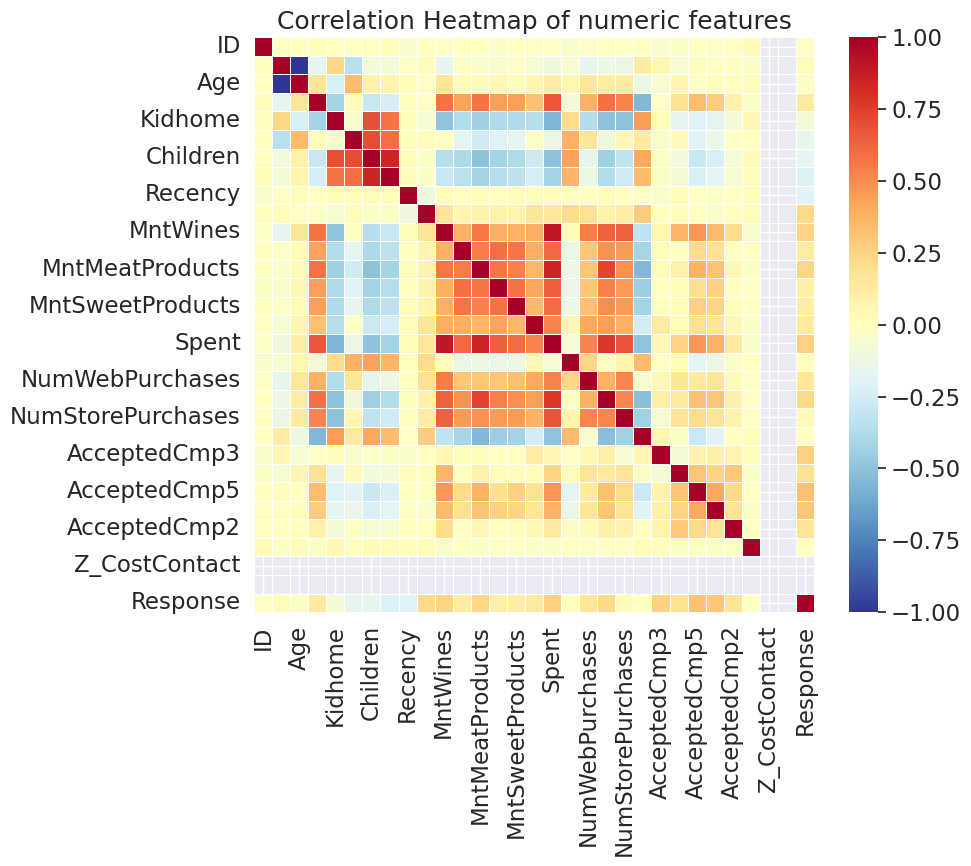

In [367]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 9))
sns.heatmap(correlation_matrix, cmap='RdYlBu_r', annot=False, fmt='.2f', linewidths=0.5, annot_kws={'fontsize':12})
plt.title('Correlation Heatmap of numeric features')
plt.tight_layout()
plt.show()

# Creating Graphs

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

## In which category does Marital_Status belong to the largest percentage of its customers company?

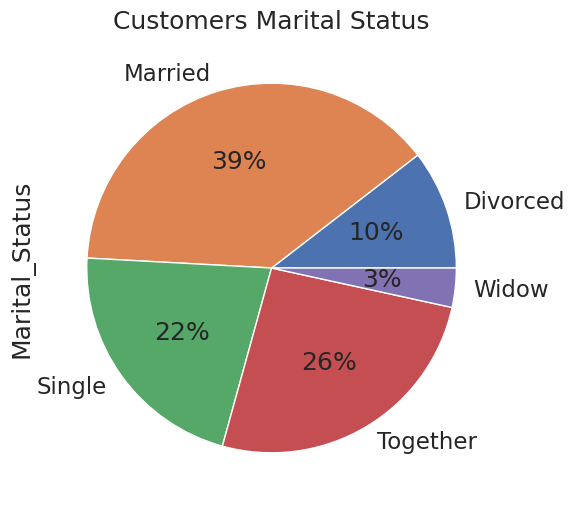

In [369]:
temp_df = df.groupby('Marital_Status')['Marital_Status'].count()
temp_df.plot.pie(figsize=(8, 6), autopct='%1.0f%%')
plt.title('Customers Marital Status')
plt.show()

## Relationship between number of purchases Spent and Marital_Status:

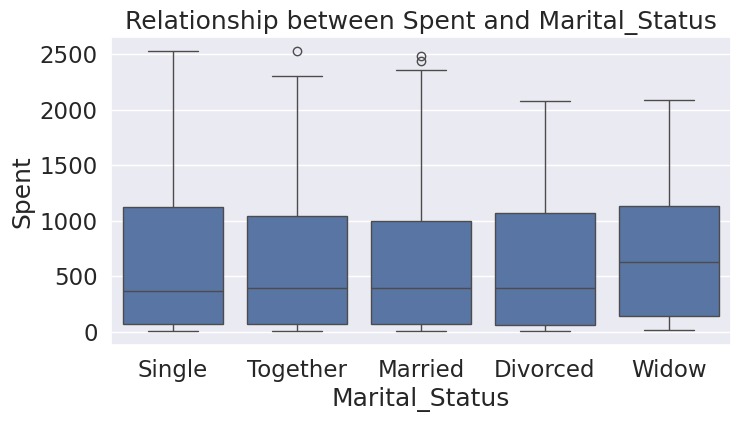

In [370]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Marital_Status', y='Spent')
sns.set_style('whitegrid')
plt.title('Relationship between Spent and Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Spent')
plt.show()

## The relationship between the number of purchases Spent, the number of Children and Family_Size.

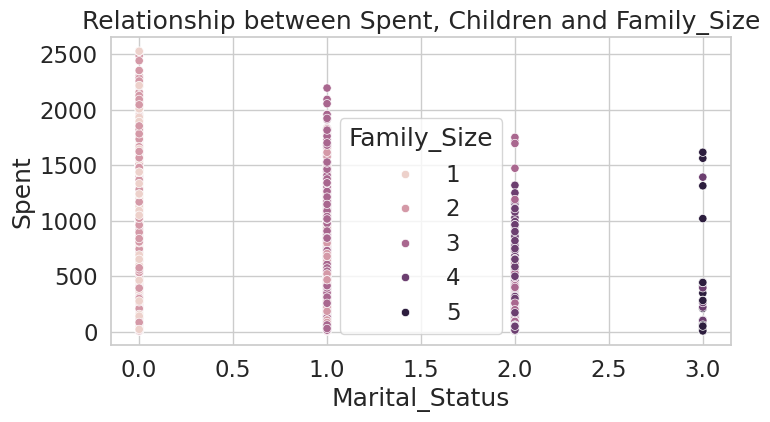

In [371]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Children', y='Spent', hue='Family_Size')
sns.set_style('whitegrid')
plt.title('Relationship between Spent, Children and Family_Size')
plt.xlabel('Marital_Status')
plt.ylabel('Spent')
plt.show()

## What does Age_Group have to do with the shopping Spent attribute?

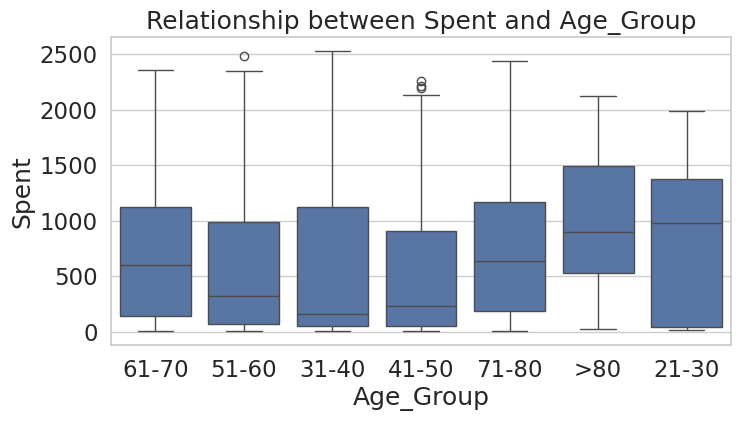

In [372]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Age_Group', y='Spent')
sns.set_style('whitegrid')
plt.title('Relationship between Spent and Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('Spent')
plt.show()

## What is the relationship between Income and Living_With?

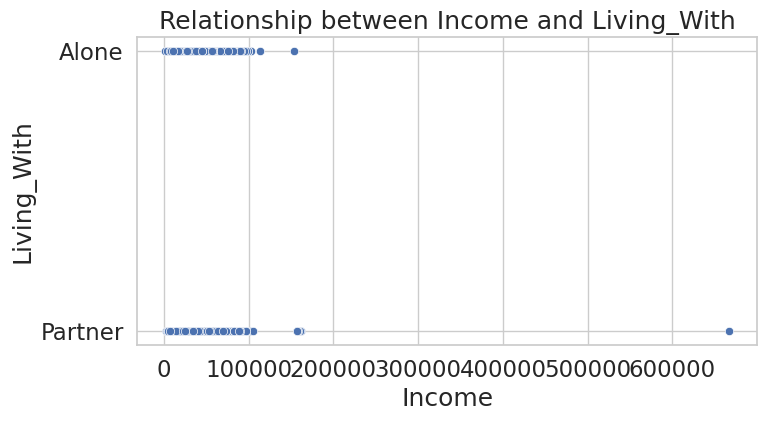

In [373]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Income', y='Living_With')
sns.set_style('whitegrid')
plt.title('Relationship between Income and Living_With')
plt.xlabel('Income')
plt.ylabel('Living_With')
plt.show()

## How many customers have complained?

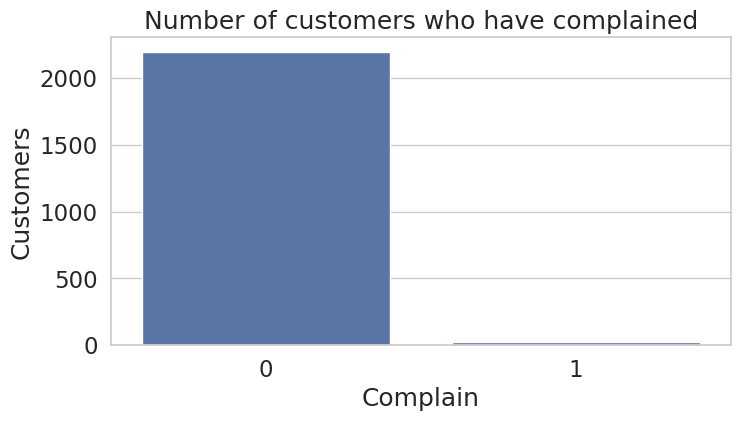

In [374]:
plt.figure(figsize=(8, 4))
sns.countplot(df, x='Complain')
sns.set_style('whitegrid')
plt.title('Number of customers who have complained')
plt.xlabel('Complain')
plt.ylabel('Customers')
plt.show()

## The histogram for the NumDealsPurchases column:

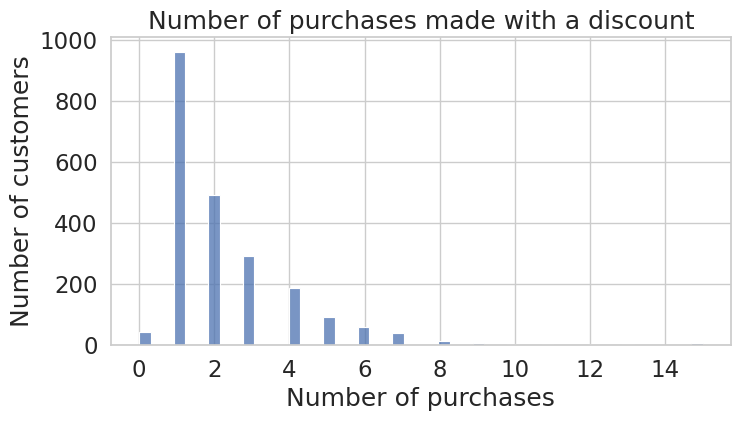

In [375]:
plt.figure(figsize=(8, 4))
sns.histplot(df, x='NumDealsPurchases')
sns.set_style('whitegrid')
plt.title('Number of purchases made with a discount')
plt.xlabel('Number of purchases')
plt.ylabel('Number of customers')
plt.show()

## The histogram for the Income column:

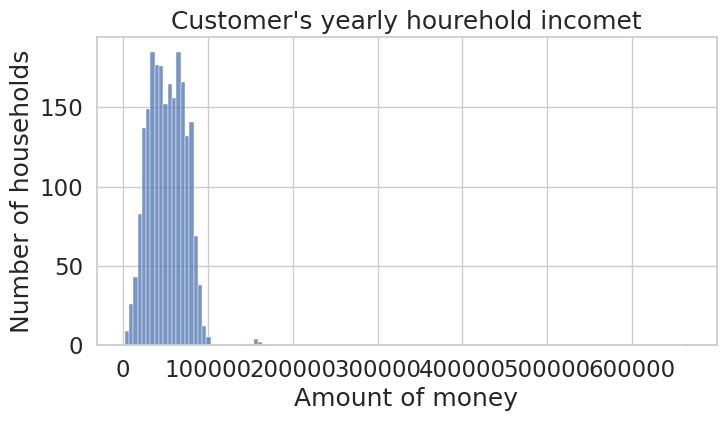

In [376]:
plt.figure(figsize=(8, 4))
sns.histplot(df, x='Income')
sns.set_style('whitegrid')
plt.title("Customer's yearly hourehold incomet")
plt.xlabel('Amount of money')
plt.ylabel('Number of households')
plt.show()

## The histogram for the Kidhome column:

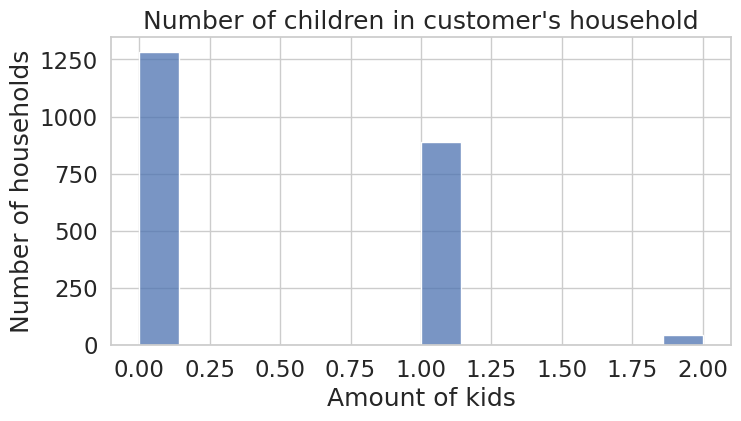

In [377]:
plt.figure(figsize=(8, 4))
sns.histplot(df, x='Kidhome')
sns.set_style('whitegrid')
plt.title("Number of children in customer's household")
plt.xlabel('Amount of kids')
plt.ylabel('Number of households')
plt.show()

## The histogram for the Family_Size column:

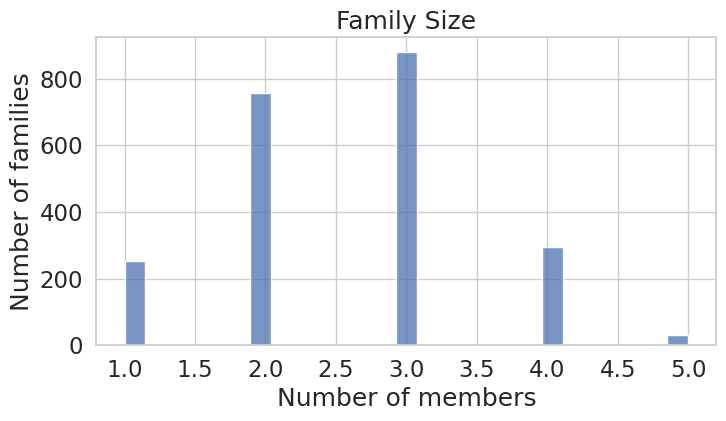

In [378]:
plt.figure(figsize=(8, 4))
sns.histplot(df, x='Family_Size')
sns.set_style('whitegrid')
plt.title("Family Size")
plt.xlabel('Number of members')
plt.ylabel('Number of families')
plt.show()

# Principal Component Analysis (PCA)

In [379]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Convert categorical features to numerical using one hot encoding

In [380]:
columns = ['Education', 'Marital_Status', 'Living_With']
for column in columns:
  encoder = LabelEncoder()
  df.loc[:, column] = encoder.fit_transform(df[column])

Creaate a copy of the dataframe with only numerical columns and drop the target column

In [381]:
temp_df = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'], axis=1)
temp_df.head()

,ID,Year_Birth,Age,Age_Group,Education,Marital_Status,Living_With,Income,Kidhome,Teenhome,...,MntSweetProducts,MntGoldProds,Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,67,61-70,0,2,0,58138.0,0,0,...,88,88,1617,3,8,10,4,7,3,11
1,2174,1954,70,61-70,0,2,0,46344.0,1,1,...,1,6,27,2,1,1,2,5,3,11
2,4141,1965,59,51-60,0,3,1,71613.0,0,0,...,21,42,776,1,8,2,10,4,3,11
3,6182,1984,40,31-40,0,3,1,26646.0,1,0,...,3,5,53,2,2,0,4,6,3,11
4,5324,1981,43,41-50,0,1,1,58293.0,1,0,...,27,15,422,5,5,3,6,5,3,11


Copy the dataframe and select only the numerical columns 

In [382]:
num_df = temp_df.select_dtypes(include=['int', 'float']).copy()
num_df.head()

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,Children,Family_Size,Recency,MntWines,...,MntSweetProducts,MntGoldProds,Spent,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
0,5524,1957,67,58138.0,0,0,0,1,58,635,...,88,88,1617,3,8,10,4,7,3,11
1,2174,1954,70,46344.0,1,1,2,3,38,11,...,1,6,27,2,1,1,2,5,3,11
2,4141,1965,59,71613.0,0,0,0,2,26,426,...,21,42,776,1,8,2,10,4,3,11
3,6182,1984,40,26646.0,1,0,1,3,26,11,...,3,5,53,2,2,0,4,6,3,11
4,5324,1981,43,58293.0,1,0,1,3,94,173,...,27,15,422,5,5,3,6,5,3,11


Standarize the data

In [383]:
scaler = StandardScaler()
num_df_std = scaler.fit_transform(num_df)
num_df_std

array([[-0.0198093 , -0.98644293,  0.98644293, ...,  0.69323197,
         0.        ,  0.        ],
       [-1.05100909, -1.23680074,  1.23680074, ..., -0.1315745 ,
         0.        ,  0.        ],
       [-0.44552551, -0.31882209,  0.31882209, ..., -0.54397773,
         0.        ,  0.        ],
       ...,
       [ 0.51764587,  1.01641959, -1.01641959, ...,  0.28082874,
         0.        ,  0.        ],
       [ 0.81469298, -1.06989553,  1.06989553, ..., -0.95638097,
         0.        ,  0.        ],
       [ 1.17484335, -1.23680074,  1.23680074, ...,  0.69323197,
         0.        ,  0.        ]])

Perform PCA with n_components=3 

In [384]:
pca = PCA(n_components=3)
pca.fit(num_df_std)
pca_df = pca.transform(num_df_std)
pca_df

array([[ 4.69437445,  0.07028652,  0.23460054],
       [-2.75868798,  1.292547  ,  1.57848443],
       [ 2.25569007, -0.41753647,  0.66090915],
       ...,
       [ 2.21564033, -1.92389942, -0.29453263],
       [ 1.82210795,  1.8957454 ,  0.75858019],
       [-2.58454941,  2.17375961,  0.67704927]])

Visualize the 3D projection of the result

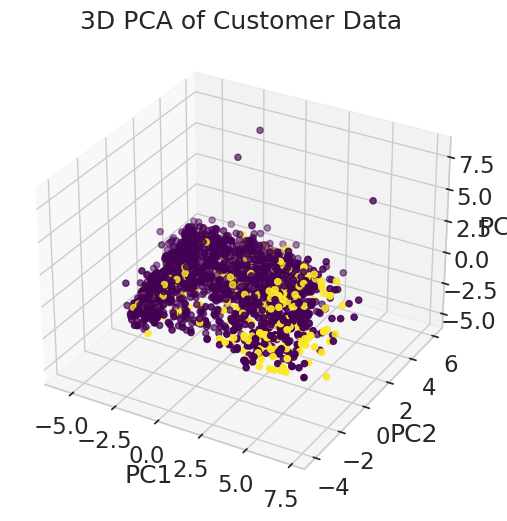

In [385]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=df['Response'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA of Customer Data')
plt.show()

# Clustering

In [386]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

Perform Elbow method to determine number of clusters 

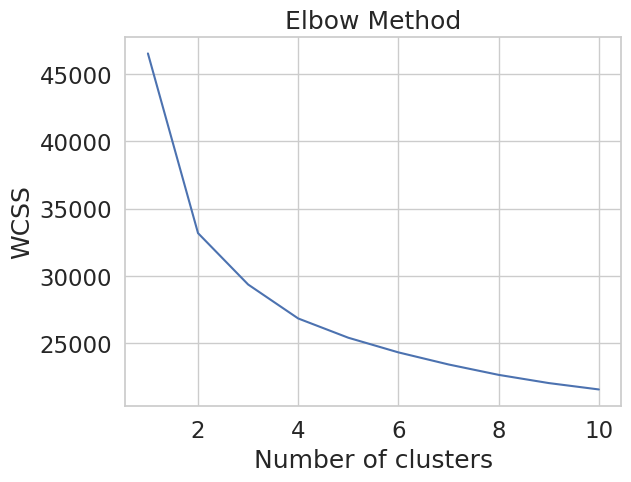

In [387]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(num_df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Perform Agglomerative Clustering

In [388]:
agg_clustering = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(num_df_std)

Plot the formed clusters using PCA

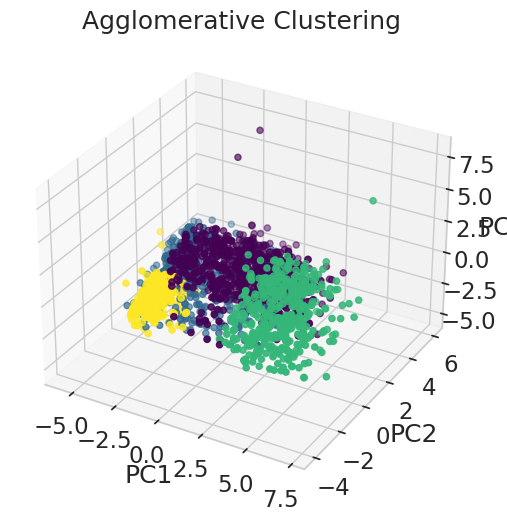

In [389]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=agg_labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Agglomerative Clustering')
plt.show()

Perform K-Means Clustering

In [390]:
kmeans_clustering = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans_clustering.fit_predict(num_df_std)

Plot the formed clusters using PCA

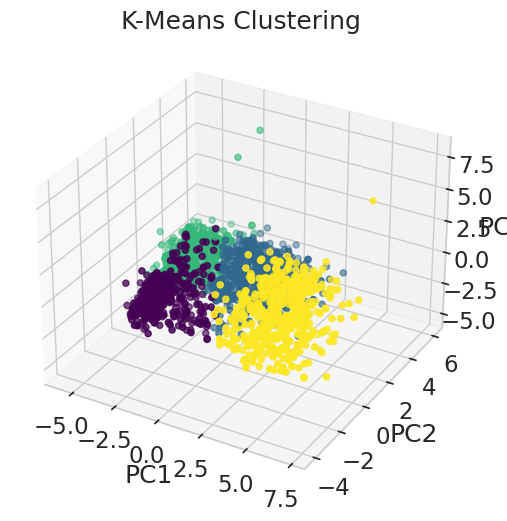

In [391]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df[:, 0], pca_df[:, 1], pca_df[:, 2], c=kmeans_labels, cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('K-Means Clustering')
plt.show()